In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
df.drop(['radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
col_names=['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points'
         ,'symmetry','fractal_dimension']
df.columns=col_names
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [6]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [7]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

2022-10-21 23:36:31.721727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
classifier = Sequential()

2022-10-21 23:36:38.898081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
classifier.add(Dense(activation="relu", input_dim=10, units=8, kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

In [14]:
classifier.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

In [15]:
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [16]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.6242
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.6374
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.6374
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.6374
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.6374
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6374
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.6374
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6374
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6440
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6462
Epoch 11/150
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9385
Epoch 85/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9407
Epoch 86/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9495
Epoch 87/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9407
Epoch 88/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9451
Epoch 89/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9385
Epoch 90/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9451
Epoch 91/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9363
Epoch 92/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9451
Epoch 93/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9516
Epoch 94/150
5/5 [===============

In [18]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
y_test.shape


(114,)

In [20]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/114)*100))

Our accuracy is 92.98245614035088%


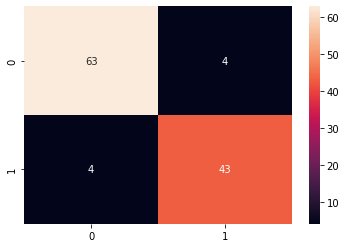

In [21]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')